# Ensemble



In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns


import warnings
import itertools
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report


# !pip install visualkeras
import tensorflow as tf
import visualkeras
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Bidirectional, LSTM, Dense, concatenate
from tensorflow.keras.models import Model
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

**Load images**

In [4]:
# pip install opencv-python
import cv2
import os

folder_path = "ds_two"             # base/root directory

no_tumor = os.listdir(folder_path + '/no_tumor/')
glioma = os.listdir(folder_path + '/glioma/')
meningioma = os.listdir(folder_path + '/meningioma/')
pituitary = os.listdir(folder_path + '/pituitary/')
craniopharyngioma = os.listdir(folder_path + '/craniopharyngioma/')

# no_tumor, glioma, meningioma, pituitary, craniopharyngioma

dataset=[]
lab=[]

In [5]:
for image_name in no_tumor:
    image=cv2.imread(folder_path + '/no_tumor/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(0)

In [6]:
for image_name in glioma:
    image=cv2.imread(folder_path + '/glioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(1)

In [7]:
for image_name in meningioma:
    image=cv2.imread(folder_path + '/meningioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(2)

In [8]:
for image_name in pituitary:
    image=cv2.imread(folder_path + '/pituitary/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(3)

In [9]:
for image_name in craniopharyngioma:
    image=cv2.imread(folder_path + '/craniopharyngioma/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240))
    dataset.append(np.array(image))
    lab.append(4)

In [10]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(7103, 240, 240, 3) (7103,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.2, shuffle=True, random_state=42)

print('Training data and target sizes: \n{}, {}'.format(x_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(x_test.shape,y_test.shape))

Training data and target sizes: 
(5682, 240, 240, 3), (5682,)
Test data and target sizes: 
(1421, 240, 240, 3), (1421,)


In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train.shape, x_test.shape

((5682, 240, 240, 3), (1421, 240, 240, 3))

In [14]:
y_train.shape, y_test.shape

((5682,), (1421,))

In [16]:
y_train.shape, y_test.shape

((5682,), (1421,))

In [18]:
from keras.preprocessing.image import ImageDataGenerator

**Data augmentation**

In [19]:
augment = ImageDataGenerator(
                             rotation_range=20,
                              width_shift_range=0.01,
                              height_shift_range=0.01,
                              horizontal_flip=False,
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

**Deep Ensemble**

VGG16, DenseNet and InceptionResNet

In [22]:
ensemble_model = tf.keras.models.load_model("dl_ensemble_70.h5")

ensemble_model.evaluate(x_test,y_test)

45/45 [==============================] - 124s 3s/step - loss: 1.6359 - accuracy: 0.9036


[1.635903000831604, 0.9035890102386475]

**Testing Ensemble Model**

In [23]:
from sklearn.metrics import classification_report


# Predict labels on the test set
y_pred = ensemble_model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

In [24]:
print(y_pred_classes.shape, y_test.shape)

(1421,) (1421,)


In [25]:
# Get class names
class_names = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma']

classification_rep = classification_report(y_test, y_pred_classes, target_names=class_names)

# Print classification report
print(classification_rep)

                   precision    recall  f1-score   support

         no_tumor       0.95      0.97      0.96       417
           glioma       0.93      0.90      0.91       335
       meningioma       0.80      0.80      0.80       321
        pituitary       0.92      0.95      0.93       336
craniopharyngioma       0.00      0.00      0.00        12

         accuracy                           0.90      1421
        macro avg       0.72      0.73      0.72      1421
     weighted avg       0.90      0.90      0.90      1421



In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_classes)

0.8411563186999853

In [27]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred_classes)
cm_df = pd.DataFrame(cm,
                     index = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma'],

                     columns = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma'])

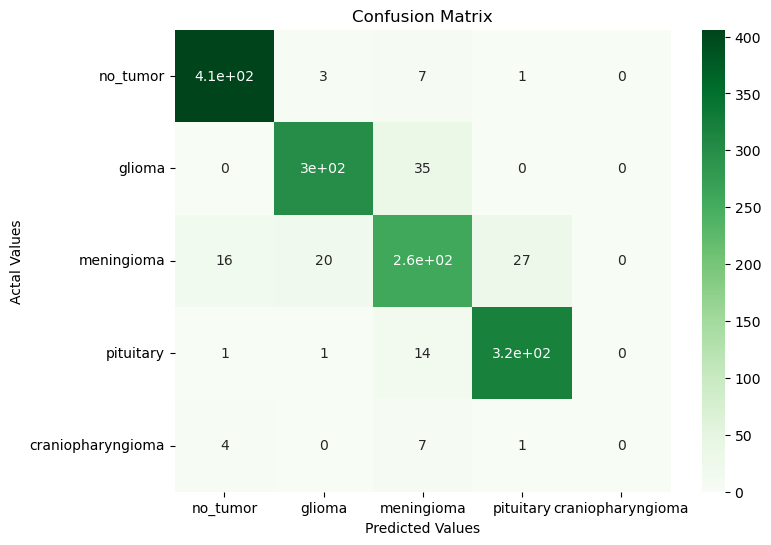

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_classes)

0.9035890218156228

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_classes,average='macro')

0.7194778719880314

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_classes,average='macro')

0.7250525522630339

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_classes,average='macro')

0.7221201209737262

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_classes,average='micro')

0.9035890218156228

In [34]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_classes,average='micro')

0.9035890218156228

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_classes,average='micro')

0.9035890218156228

In [36]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_classes,average='weighted')

0.8956771412316923

In [37]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_classes,average='weighted')

0.9035890218156228

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_classes,average='weighted')

0.8994540239355383

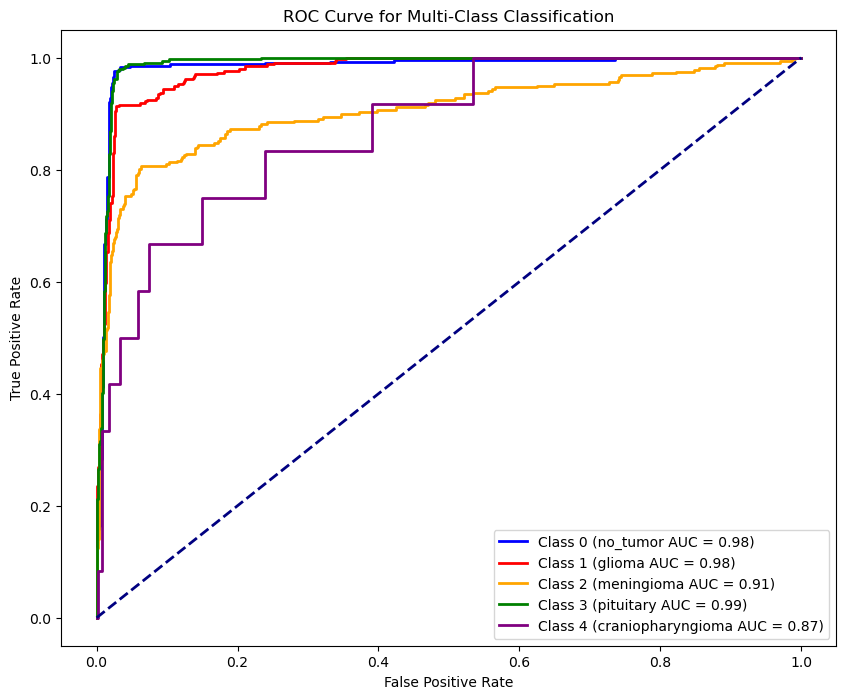

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

classes = ['no_tumor', 'glioma', 'meningioma', 'pituitary', 'craniopharyngioma']

y_true = y_test
raw_predictions = ensemble_model.predict(x_test)

y_prob = scipy.special.softmax(raw_predictions, axis=-1)

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.arange(9))

# Initialize variables
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define colors for each class
colors = ['blue', 'red',  'orange', 'green', 'purple']

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} ({classes[i]} AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()

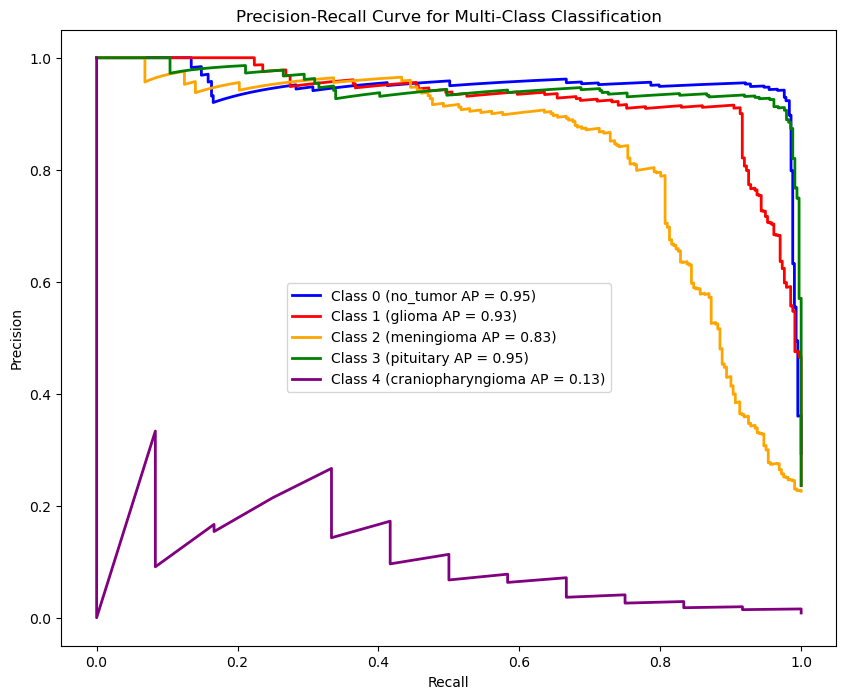

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Initialize arrays for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()


for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_prob[:, i])

# Define colors for each class
colors = ['blue', 'red',  'orange', 'green', 'purple']

# Plot the precision-recall curves
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(recall[i], precision[i], color=colors[i], lw=2, label=f'Class {i} ({classes[i]} AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend()
plt.show()

[[406   3   7   1   0]
 [  0 300  35   0   0]
 [ 16  20 258  27   0]
 [  1   1  14 320   0]
 [  4   0   7   1   0]]


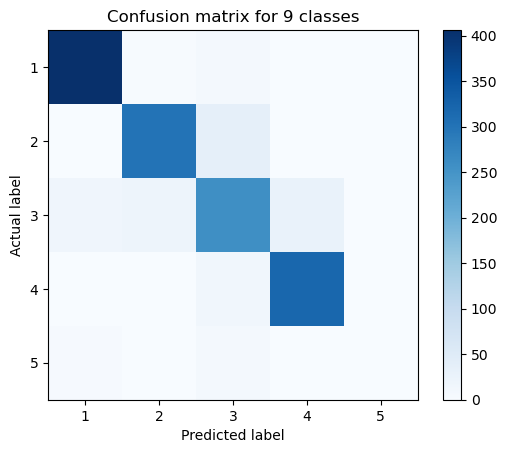

In [41]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Find the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(5), np.arange(1, 6))
plt.yticks(np.arange(5), np.arange(1, 6))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix for 5 classes')
plt.show()

In [42]:
# Import numpy library
import numpy as np


# Get the number of classes
n_classes = cm.shape[0]

# Initialize an empty list to store the specificity values
specificity = []

# Loop over each class
for i in range(n_classes):
  # Calculate the true negatives and false positives for class i
  tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i])
  fp = np.sum(cm[:, i]) - cm[i, i]

  # Calculate the specificity for class i
  spec = tn / (tn + fp)

  # Append the specificity to the list
  specificity.append(spec)

# Print the specificity values
print("Specificity for each class:")
for i in range(n_classes):
  print(f"Class {i}: {specificity[i]:.2f}")


Specificity for each class:
Class 0: 0.96
Class 1: 0.97
Class 2: 0.93
Class 3: 0.96
Class 4: 1.00


In [43]:
# Import numpy library
import numpy as np

# Calculate the false positives, false negatives, true positives, and true negatives for each class
fp = np.sum(cm, axis=0) - np.diag(cm)
fn = np.sum(cm, axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = np.sum(cm) - (fp + fn + tp)

# Calculate the false positive rate, false negative rate, true positive rate, and true negative rate for each class
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Print the FPR, FNR, TPR, and TNR values for each class
print("FPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fpr[i]:.2f}")

print("FNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {fnr[i]:.2f}")

print("TPR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tpr[i]:.2f}")

print("TNR for each class:")
for i in range(n_classes):
  print(f"Class {i}: {tnr[i]:.2f}")

FPR for each class:
Class 0: 0.02
Class 1: 0.02
Class 2: 0.06
Class 3: 0.03
Class 4: 0.00
FNR for each class:
Class 0: 0.03
Class 1: 0.10
Class 2: 0.20
Class 3: 0.05
Class 4: 1.00
TPR for each class:
Class 0: 0.97
Class 1: 0.90
Class 2: 0.80
Class 3: 0.95
Class 4: 0.00
TNR for each class:
Class 0: 0.98
Class 1: 0.98
Class 2: 0.94
Class 3: 0.97
Class 4: 1.00
